In [28]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [29]:
fmnist=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fmnist.load_data()

In [30]:
len(x_train)
len(y_train)

60000

In [31]:
len(x_test)
len(y_test)

10000

In [32]:
x_train.shape

(60000, 28, 28)

In [33]:
x_test.shape

(10000, 28, 28)

In [34]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

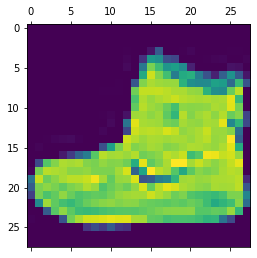

In [35]:
plt.matshow(x_train[0])

In [36]:
x_train=x_train/255
x_test=x_test/255

In [37]:
x_train[0] 

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [38]:
model=keras.Sequential([
# Input Layer
keras.layers.Flatten(input_shape = (28,28)),
# Hidden Layer
keras.layers.Dense(128,activation ='relu'),
# Output Layer
keras.layers.Dense(20,activation = 'softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 20)                2580      
                                                                 
Total params: 103,060
Trainable params: 103,060
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#Train the model using SGD
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7741 - accuracy: 0.7506 - val_loss: 0.5867 - val_accuracy: 0.7956
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5188 - accuracy: 0.8230 - val_loss: 0.5137 - val_accuracy: 0.8215
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4727 - accuracy: 0.8372 - val_loss: 0.5003 - val_accuracy: 0.8238
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4457 - accuracy: 0.8461 - val_loss: 0.4585 - val_accuracy: 0.8395
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4292 - accuracy: 0.8504 - val_loss: 0.4621 - val_accuracy: 0.8392
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4148 - accuracy: 0.8564 - val_loss: 0.4557 - val_accuracy: 0.8374
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4046 - accuracy: 0.8592 - val_loss: 0.4370 - val_accuracy:

In [40]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.4067 - accuracy: 0.8552
Loss=0.407
Accuracy=0.855


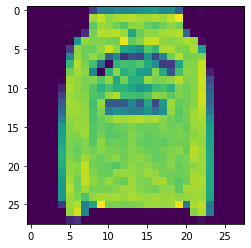

In [41]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [50]:
predicted_value=model.predict(x_test)
print("Image is = %d" %np.argmax(predicted_value[0]))

313/313 [==============================] - 1s 2ms/step
Image is = 9


In [59]:
# class_labels=["T - shirt / top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker"
#               class_labels[np.argmax(predicted_value[0])]

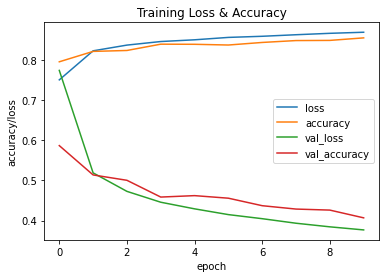

In [58]:
history.history.keys()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss & Accuracy')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
plt.show()